# Airbnb Price Prediction Model

### Import Necessary Packages

In [260]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline
#figure % new figure window
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import RidgeCV
from math import sqrt
from yellowbrick.features import ParallelCoordinates
from yellowbrick.regressor import ResidualsPlot
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import boxcox
import warnings
from statsmodels.graphics.regressionplots import abline_plot

warnings.filterwarnings('ignore')

In [106]:
#Load Data

df = pd.read_csv('sea_listings.csv')
listingdf = df

### Data Clean Up:

- Review all available columns
- Determine what are the columns are essential and drop remainder columns from the dataframe
- Drop rows that have missing information
- Remove the signs on host_response_rate & host_acceptance_rate & price & cleaning_fee columns and tunr number into float
- Remove spaces and signs that causes error when turning columns into dummies variable



In [107]:
#Droping columns that's not needed in the analysis

listingdf = listingdf.drop('listing_url', axis = 1)
listingdf = listingdf.drop('scrape_id', axis = 1)
listingdf = listingdf.drop('last_scraped', axis = 1)
listingdf = listingdf.drop('name', axis = 1)
listingdf = listingdf.drop('summary', axis = 1)
listingdf = listingdf.drop('space', axis = 1)
listingdf = listingdf.drop('description', axis = 1)
listingdf = listingdf.drop('experiences_offered', axis = 1)
listingdf = listingdf.drop('neighborhood_overview', axis = 1)
listingdf = listingdf.drop('notes', axis = 1)
listingdf = listingdf.drop('transit', axis = 1)
listingdf = listingdf.drop('thumbnail_url', axis = 1)
listingdf = listingdf.drop('medium_url', axis = 1)
listingdf = listingdf.drop('picture_url', axis = 1)
listingdf = listingdf.drop('xl_picture_url', axis = 1)
listingdf = listingdf.drop('host_id', axis = 1)
listingdf = listingdf.drop('host_url', axis = 1)
listingdf = listingdf.drop('host_name', axis = 1)
listingdf = listingdf.drop('host_since', axis = 1)
listingdf = listingdf.drop('host_location', axis = 1)
listingdf = listingdf.drop('host_about', axis = 1)
#listingdf = listingdf.drop('host_response_time, axis = 1) #maybe
listingdf = listingdf.drop('host_thumbnail_url', axis = 1)
listingdf = listingdf.drop('street', axis = 1)
listingdf = listingdf.drop('host_picture_url', axis = 1)
listingdf = listingdf.drop('host_neighbourhood', axis = 1)
listingdf = listingdf.drop('host_listings_count', axis = 1)
listingdf = listingdf.drop('host_total_listings_count', axis = 1)
listingdf = listingdf.drop('host_verifications', axis = 1)
listingdf = listingdf.drop('host_has_profile_pic', axis = 1)
listingdf = listingdf.drop('host_identity_verified', axis = 1)
listingdf = listingdf.drop('neighbourhood', axis = 1)
listingdf = listingdf.drop('neighbourhood_group_cleansed', axis = 1)
listingdf = listingdf.drop('city', axis = 1)
listingdf = listingdf.drop('state', axis = 1)
listingdf = listingdf.drop('market', axis = 1)
listingdf = listingdf.drop('country', axis = 1)
listingdf = listingdf.drop('latitude', axis = 1)
listingdf = listingdf.drop('longitude', axis = 1)
listingdf = listingdf.drop('is_location_exact', axis = 1)
listingdf = listingdf.drop('square_feet', axis = 1)
listingdf = listingdf.drop('weekly_price', axis = 1)
listingdf = listingdf.drop('monthly_price', axis = 1)
listingdf = listingdf.drop('security_deposit', axis = 1)
listingdf = listingdf.drop('calendar_updated', axis = 1)
listingdf = listingdf.drop('has_availability', axis = 1)
listingdf = listingdf.drop('availability_30', axis = 1)
listingdf = listingdf.drop('availability_60', axis = 1)
listingdf = listingdf.drop('availability_90', axis = 1)
listingdf = listingdf.drop('availability_365', axis = 1)
listingdf = listingdf.drop('calendar_last_scraped', axis = 1)
listingdf = listingdf.drop('first_review', axis = 1)
listingdf = listingdf.drop('last_review', axis = 1)
listingdf = listingdf.drop('requires_license', axis = 1)
listingdf = listingdf.drop('license', axis = 1)
listingdf = listingdf.drop('jurisdiction_names', axis = 1)
listingdf = listingdf.drop('require_guest_profile_picture', axis = 1)
listingdf = listingdf.drop('require_guest_phone_verification', axis = 1)
listingdf = listingdf.drop('calculated_host_listings_count', axis = 1)
listingdf = listingdf.drop('reviews_per_month', axis = 1)
listingdf = listingdf.drop('smart_location', axis = 1) # maybe
listingdf = listingdf.drop('zipcode', axis = 1) # maybe
listingdf = listingdf.drop('country_code', axis = 1) # maybe
listingdf = listingdf.drop('amenities', axis = 1) # to be added later
listingdf = listingdf.drop('extra_people', axis = 1) # to be added later
listingdf = listingdf.drop('id', axis = 1) 

In [108]:
#Drop rows that have missing information

listingdf = listingdf.dropna()


In [109]:
#Remove the signs on host_response_rate & host_acceptance_rate & price & cleaning_fee columns and tunr number into float

listingdf['host_response_rate'] = listingdf['host_response_rate'].str.replace('%','')
listingdf['host_response_rate'] = listingdf['host_response_rate'].astype('float')

listingdf['host_acceptance_rate'] = listingdf['host_acceptance_rate'].str.replace('%','')
listingdf['host_acceptance_rate'] = listingdf['host_acceptance_rate'].astype('float')

listingdf['price'] = listingdf['price'].str.replace('$','')
listingdf['price'] = listingdf['price'].astype('float')

listingdf['cleaning_fee'] = listingdf['cleaning_fee'].str.replace('$','')
listingdf['cleaning_fee'] = listingdf['cleaning_fee'].astype('float')


In [110]:
# Remove spaces and signs that causes error when turning columns into dummies variable

datawithspace = ['host_response_time', 'neighbourhood_cleansed', 'bed_type', 'room_type','property_type']

for i in datawithspace:
    listingdf[i] = listingdf[i].str.replace(' ', '')
    listingdf[i] = listingdf[i].str.replace('&', '_')
    listingdf[i] = listingdf[i].str.replace('/', '_')
    listingdf[i] = listingdf[i].str.replace('-', '_')
    
datawithsign = ['room_type']

for s in datawithsign:
    listingdf[s] = listingdf[s].str.replace('/', '_')
  
columnsstrs = ['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']

for x in columnsstrs:

    listingdf[x].str.lower()

In [111]:
#sns.pairplot(listingdf[property_type])

In [185]:
# Turn columns into dummy variables & reset index as rows were dropped previously

listingdf2 = pd.get_dummies(listingdf, columns=['instant_bookable', 'bed_type', 'room_type','property_type','host_is_superhost', 'neighbourhood_cleansed', 'host_response_time', 'cancellation_policy'])
listingdf2 = listingdf2.reset_index(drop=True)

# Move column price to the end of dataframe
listingdf2['f_price'] = listingdf2['price']
listingdf2  = listingdf2.drop(['price'], 1)

listingdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Columns: 136 entries, host_response_rate to f_price
dtypes: float64(14), int64(5), uint8(117)
memory usage: 536.5 KB


### Look at distribution of price, normalizing to normal distribution by apply log transformation

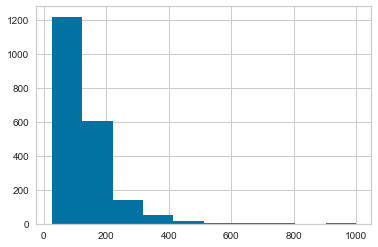

In [113]:
listingdf2.f_price.hist()

In [114]:
#Calculate mean of all listing price

listingdf2['log_price'] = listingdf2['f_price']
listingdf2['log_price'] = np.log(listingdf2.log_price)
listingdf2['f_price'].mean()

130.1234084231146

### Look at corrations

In [115]:
listingdf2.corr()

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,maximum_nights,...,neighbourhood_cleansed_YeslerTerrace,host_response_time_afewdaysormore,host_response_time_withinaday,host_response_time_withinafewhours,host_response_time_withinanhour,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,f_price,log_price
host_response_rate,1.000000,-0.009560,0.007824,0.003128,-0.002636,0.007934,-0.057630,0.060826,0.006647,-0.093712,...,-0.045443,-0.522945,-0.348042,-0.002785,0.335559,-0.070824,0.028530,0.026525,-0.028064,-0.027812
host_acceptance_rate,-0.009560,1.000000,0.017525,0.010376,0.008363,0.015648,0.018437,0.013200,-0.000447,-0.017245,...,0.001473,0.001904,-0.055072,0.014093,0.025233,0.010154,-0.030285,0.021180,0.008931,0.006438
accommodates,0.007824,0.017525,1.000000,0.588158,0.776129,0.863926,0.672942,0.538664,0.008487,0.025940,...,-0.003114,-0.018673,0.052502,0.035830,-0.066174,-0.157123,-0.158255,0.270139,0.662136,0.678967
bathrooms,0.003128,0.010376,0.588158,1.000000,0.665838,0.566883,0.540392,0.335815,-0.002668,-0.000066,...,-0.018382,-0.010518,0.028587,0.064866,-0.077421,-0.047131,-0.116432,0.146801,0.589560,0.499638
bedrooms,-0.002636,0.008363,0.776129,0.665838,1.000000,0.754958,0.627687,0.474650,0.000928,0.005307,...,-0.025138,-0.007290,0.064339,0.057633,-0.096322,-0.120771,-0.128143,0.213841,0.643387,0.601728
beds,0.007934,0.015648,0.863926,0.566883,0.754958,1.000000,0.642882,0.467802,-0.010407,0.019655,...,-0.017025,-0.032876,0.028400,0.039623,-0.050371,-0.123905,-0.140276,0.227790,0.609165,0.588152
cleaning_fee,-0.057630,0.018437,0.672942,0.540392,0.627687,0.642882,1.000000,0.344320,0.019094,0.029633,...,-0.029986,-0.002297,0.113140,0.024729,-0.101176,-0.218682,-0.184235,0.341622,0.672466,0.677648
guests_included,0.060826,0.013200,0.538664,0.335815,0.474650,0.467802,0.344320,1.000000,-0.008992,-0.051294,...,0.002562,-0.030819,-0.035508,0.028723,0.003845,-0.124046,-0.079040,0.169495,0.426220,0.415734
minimum_nights,0.006647,-0.000447,0.008487,-0.002668,0.000928,-0.010407,0.019094,-0.008992,1.000000,0.014069,...,-0.003993,0.003548,-0.007272,0.033780,-0.026406,-0.019478,0.028581,-0.012480,0.016511,0.023064
maximum_nights,-0.093712,-0.017245,0.025940,-0.000066,0.005307,0.019655,0.029633,-0.051294,0.014069,1.000000,...,0.024768,0.044244,0.012911,-0.032988,0.013513,0.060031,-0.043927,-0.003651,0.000067,0.006087


#### Determined to use log price instead Boxcox as it appear to give similar result

-0.2022252223726587


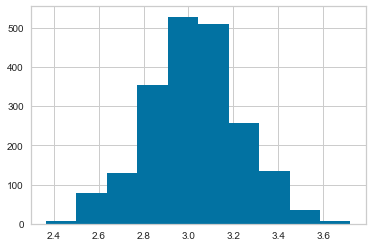

In [116]:
lamb=stats.boxcox_normmax(listingdf2.f_price, brack=(-1.9, 1.9))
print(lamb)
y_t=(np.power(listingdf2.f_price,-0.20223)-1)/-0.20223

plt.hist(y_t);

(array([ 26., 133., 319., 566., 539., 262., 126.,  54.,  11.,   6.]),
 array([3.21887582, 3.58766372, 3.95645162, 4.32523951, 4.69402741,
        5.0628153 , 5.4316032 , 5.80039109, 6.16917899, 6.53796688,
        6.90675478]),
 <a list of 10 Patch objects>)

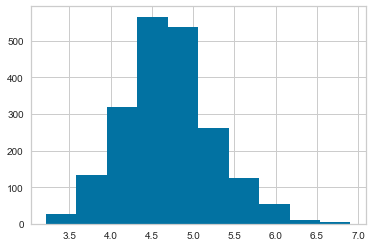

In [117]:
plt.hist(np.log(listingdf2.f_price))

#### Look at distribution of property types

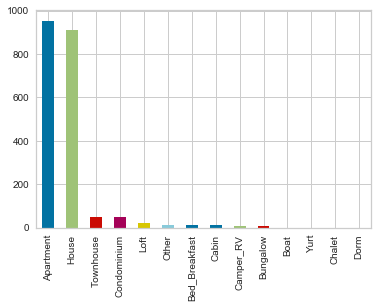

In [118]:

listingdf['property_type'].value_counts().plot(kind='bar')

#### Look at distribution of price

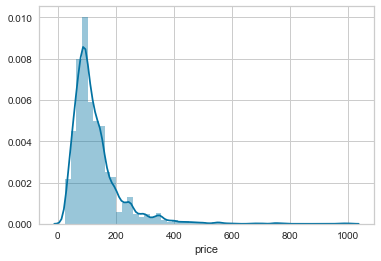

In [119]:
sns.distplot(listingdf['price'])

#### Look at distribution of accommodates, bathrooms, bedrooms and beds. 
- They all have similar distribution and related to each other

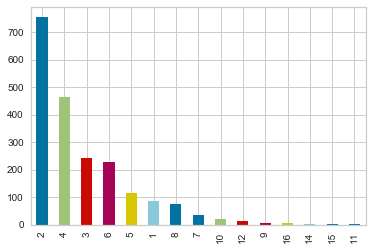

In [120]:
listingdf['accommodates'].value_counts().plot(kind='bar')   #figsize=(20,15)

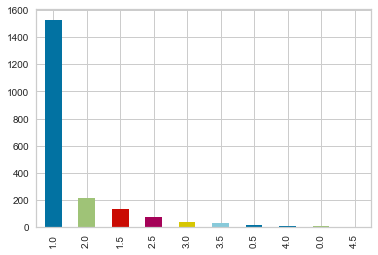

In [192]:
listingdf['bathrooms'].value_counts().plot(kind='bar')

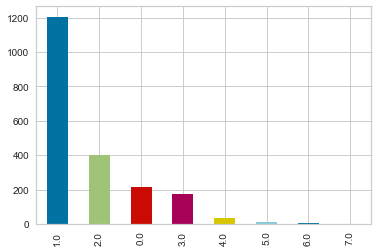

In [193]:
listingdf['bedrooms'].value_counts().plot(kind='bar')

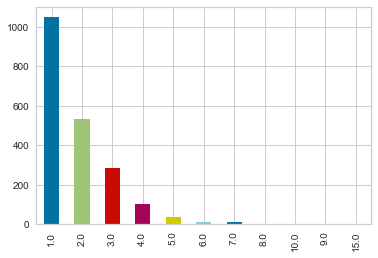

In [194]:
listingdf['beds'].value_counts().plot(kind='bar')

### OLS Model - With ALL Features

In [257]:
X = listingdf2.iloc[:,:-3]
y = listingdf2.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size=0.2)

##### OLS - X, y without train test split (without transformation of value or features)

In [258]:
#y, X = patsy.dmatrices('f_price ~ host_response_rate + host_acceptance_rate + accommodates + bathrooms + bedrooms + beds + cleaning_fee + guests_included + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable_f + instant_bookable_t + bed_type_Airbed + bed_type_Couch + bed_type_Futon + bed_type_Pull_outSofa + bed_type_RealBed + room_type_Entirehome_apt + room_type_Privateroom + room_type_Sharedroom + property_type_Apartment + property_type_Bed_Breakfast + property_type_Boat + property_type_Bungalow + property_type_Cabin + property_type_Camper_RV + property_type_Chalet + property_type_Condominium + property_type_Dorm + property_type_House + property_type_Loft + property_type_Other + property_type_Townhouse + property_type_Yurt + neighbourhood_cleansed_Adams + neighbourhood_cleansed_Alki + neighbourhood_cleansed_ArborHeights + neighbourhood_cleansed_Atlantic + neighbourhood_cleansed_Belltown + neighbourhood_cleansed_BitterLake + neighbourhood_cleansed_Briarcliff + neighbourhood_cleansed_Brighton + neighbourhood_cleansed_Broadview + neighbourhood_cleansed_Broadway + neighbourhood_cleansed_Bryant + neighbourhood_cleansed_CedarPark + neighbourhood_cleansed_CentralBusinessDistrict + neighbourhood_cleansed_ColumbiaCity + neighbourhood_cleansed_CrownHill + neighbourhood_cleansed_Dunlap + neighbourhood_cleansed_EastQueenAnne + neighbourhood_cleansed_Eastlake + neighbourhood_cleansed_FairmountPark + neighbourhood_cleansed_Fauntleroy + neighbourhood_cleansed_FirstHill + neighbourhood_cleansed_Fremont + neighbourhood_cleansed_Gatewood + neighbourhood_cleansed_Genesee + neighbourhood_cleansed_Georgetown + neighbourhood_cleansed_GreenLake + neighbourhood_cleansed_Greenwood + neighbourhood_cleansed_HallerLake + neighbourhood_cleansed_Harrison_Denny_Blaine + neighbourhood_cleansed_HighPoint + neighbourhood_cleansed_HighlandPark + neighbourhood_cleansed_Interbay + neighbourhood_cleansed_InternationalDistrict + neighbourhood_cleansed_Laurelhurst + neighbourhood_cleansed_LawtonPark + neighbourhood_cleansed_Leschi + neighbourhood_cleansed_LowerQueenAnne + neighbourhood_cleansed_LoyalHeights + neighbourhood_cleansed_MadisonPark + neighbourhood_cleansed_Madrona + neighbourhood_cleansed_Mann + neighbourhood_cleansed_MapleLeaf + neighbourhood_cleansed_MatthewsBeach + neighbourhood_cleansed_Meadowbrook + neighbourhood_cleansed_Mid_BeaconHill + neighbourhood_cleansed_Minor + neighbourhood_cleansed_Montlake + neighbourhood_cleansed_MountBaker + neighbourhood_cleansed_NorthAdmiral + neighbourhood_cleansed_NorthBeach_BlueRidge + neighbourhood_cleansed_NorthBeaconHill + neighbourhood_cleansed_NorthCollegePark + neighbourhood_cleansed_NorthDelridge + neighbourhood_cleansed_NorthQueenAnne + neighbourhood_cleansed_OlympicHills + neighbourhood_cleansed_PhinneyRidge + neighbourhood_cleansed_Pike_Market + neighbourhood_cleansed_Pinehurst + neighbourhood_cleansed_PioneerSquare + neighbourhood_cleansed_PortageBay + neighbourhood_cleansed_RainierBeach + neighbourhood_cleansed_Ravenna + neighbourhood_cleansed_Riverview + neighbourhood_cleansed_Roosevelt + neighbourhood_cleansed_Seaview + neighbourhood_cleansed_SewardPark + neighbourhood_cleansed_SouthBeaconHill + neighbourhood_cleansed_SouthDelridge + neighbourhood_cleansed_SouthLakeUnion + neighbourhood_cleansed_SouthPark + neighbourhood_cleansed_SoutheastMagnolia + neighbourhood_cleansed_Stevens + neighbourhood_cleansed_SunsetHill + neighbourhood_cleansed_UniversityDistrict + neighbourhood_cleansed_VictoryHeights + neighbourhood_cleansed_ViewRidge + neighbourhood_cleansed_Wallingford + neighbourhood_cleansed_Wedgwood + neighbourhood_cleansed_WestQueenAnne + neighbourhood_cleansed_WestWoodland + neighbourhood_cleansed_Westlake + neighbourhood_cleansed_WhittierHeights + neighbourhood_cleansed_Windermere + neighbourhood_cleansed_YeslerTerrace + host_is_superhost_f + host_is_superhost_t + neighbourhood_cleansed_Adams + neighbourhood_cleansed_Alki + neighbourhood_cleansed_ArborHeights + neighbourhood_cleansed_Atlantic + neighbourhood_cleansed_Belltown + neighbourhood_cleansed_BitterLake + neighbourhood_cleansed_Briarcliff + neighbourhood_cleansed_Brighton + neighbourhood_cleansed_Broadview + neighbourhood_cleansed_Broadway + neighbourhood_cleansed_Bryant + neighbourhood_cleansed_CedarPark + neighbourhood_cleansed_CentralBusinessDistrict + neighbourhood_cleansed_ColumbiaCity + neighbourhood_cleansed_CrownHill + neighbourhood_cleansed_Dunlap + neighbourhood_cleansed_EastQueenAnne + neighbourhood_cleansed_Eastlake + neighbourhood_cleansed_FairmountPark + neighbourhood_cleansed_Fauntleroy + neighbourhood_cleansed_FirstHill + neighbourhood_cleansed_Fremont + neighbourhood_cleansed_Gatewood + neighbourhood_cleansed_Genesee + neighbourhood_cleansed_Georgetown + neighbourhood_cleansed_GreenLake + neighbourhood_cleansed_Greenwood + neighbourhood_cleansed_HallerLake + neighbourhood_cleansed_Harrison_Denny_Blaine + neighbourhood_cleansed_HighPoint + neighbourhood_cleansed_HighlandPark + neighbourhood_cleansed_Interbay + neighbourhood_cleansed_InternationalDistrict + neighbourhood_cleansed_Laurelhurst + neighbourhood_cleansed_LawtonPark + neighbourhood_cleansed_Leschi + neighbourhood_cleansed_LowerQueenAnne + neighbourhood_cleansed_LoyalHeights + neighbourhood_cleansed_MadisonPark + neighbourhood_cleansed_Madrona + neighbourhood_cleansed_Mann + neighbourhood_cleansed_MapleLeaf + neighbourhood_cleansed_MatthewsBeach + neighbourhood_cleansed_Meadowbrook + neighbourhood_cleansed_Mid_BeaconHill + neighbourhood_cleansed_Minor + neighbourhood_cleansed_Montlake + neighbourhood_cleansed_MountBaker + neighbourhood_cleansed_NorthAdmiral + neighbourhood_cleansed_NorthBeach_BlueRidge + neighbourhood_cleansed_NorthBeaconHill + neighbourhood_cleansed_NorthCollegePark + neighbourhood_cleansed_NorthDelridge + neighbourhood_cleansed_NorthQueenAnne + neighbourhood_cleansed_OlympicHills + neighbourhood_cleansed_PhinneyRidge + neighbourhood_cleansed_Pike_Market + neighbourhood_cleansed_Pinehurst + neighbourhood_cleansed_PioneerSquare + neighbourhood_cleansed_PortageBay + neighbourhood_cleansed_RainierBeach + neighbourhood_cleansed_Ravenna + neighbourhood_cleansed_Riverview + neighbourhood_cleansed_Roosevelt + neighbourhood_cleansed_Seaview + neighbourhood_cleansed_SewardPark + neighbourhood_cleansed_SouthBeaconHill + neighbourhood_cleansed_SouthDelridge + neighbourhood_cleansed_SouthLakeUnion + neighbourhood_cleansed_SouthPark + neighbourhood_cleansed_SoutheastMagnolia + neighbourhood_cleansed_Stevens + neighbourhood_cleansed_SunsetHill + neighbourhood_cleansed_UniversityDistrict + neighbourhood_cleansed_VictoryHeights + neighbourhood_cleansed_ViewRidge + neighbourhood_cleansed_Wallingford + neighbourhood_cleansed_Wedgwood + neighbourhood_cleansed_WestQueenAnne + neighbourhood_cleansed_WestWoodland + neighbourhood_cleansed_Westlake + neighbourhood_cleansed_WhittierHeights + neighbourhood_cleansed_Windermere + neighbourhood_cleansed_YeslerTerrace + host_response_time_afewdaysormore + host_response_time_withinaday + host_response_time_withinafewhours + host_response_time_withinanhour + cancellation_policy_flexible + cancellation_policy_moderate + cancellation_policy_strict', data=listingdf2, return_type="dataframe")

model = sm.OLS(y,X)
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     48.70
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:44:08   Log-Likelihood:                -169.15
No. Observations:                2042   AIC:                             594.3
Df Residuals:                    1914   BIC:                             1314.
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
host_response_rate                                -0.0007      0.001     -0.824      0.410      -0.002       0.001
host_acceptance_rate                              -0.0071      0.003     -2.511      0.012      -0.013      -0.002
accommodates                                       0.0378      0.007      5.162      0.000       0.023       0.052
bathrooms                                          0.0789      0.016      4.980      0.000       0.048       0.110
bedrooms                                           0.1359      0.013     10.191      0.000       0.110       0.162
beds                                              -0.0119      0.011     -1.106      0.269      -0.033       0.009
cleaning_fee                                       0.0020      0.000      9.706      0.000       0.002       0.002
guests_included                                    0.0225      0.005      4.131      0.000       0.012       0.033
minimum_nights                                     0.0001      0.000      0.544      0.586      -0.000       0.001
maximum_nights                                 -1.884e-05   1.28e-05     -1.472      0.141   -4.39e-05    6.26e-06
number_of_reviews                                 -0.0007      0.000     -3.744      0.000      -0.001      -0.000
review_scores_rating                               0.0068      0.002      4.167      0.000       0.004       0.010
review_scores_accuracy                             0.0085      0.012      0.708      0.479      -0.015       0.032
review_scores_cleanliness                         -0.0026      0.011     -0.226      0.821      -0.025       0.020
review_scores_checkin                              0.0060      0.015      0.410      0.682      -0.023       0.035
review_scores_communication                       -0.0052      0.017     -0.314      0.754      -0.038       0.027
review_scores_location                             0.0200      0.013      1.579      0.114      -0.005       0.045
review_scores_value                               -0.0664      0.012     -5.331      0.000      -0.091      -0.042
instant_bookable_f                                 1.1908      0.089     13.316      0.000       1.015       1.366
instant_bookable_t                                 1.1662      0.089     13.082      0.000       0.991       1.341
bed_type_Airbed                                    0.5040      0.091      5.513      0.000       0.325       0.683
bed_type_Couch                                     0.3863      0.145      2.655      0.008       0.101       0.672
bed_type_Futon                                     0.5012      0.069      7.281      0.000       0.366       0.636
bed_type_Pull_outSofa                              0.4221      0.065      6.537      0.000   

##### OLS - X, y with train test split

In [210]:
modeltrain = sm.OLS(y_train, X_train)
fit2 = modeltrain.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                f_price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     28.72
Date:                Thu, 26 Apr 2018   Prob (F-statistic):          3.56e-314
Time:                        19:32:02   Log-Likelihood:                -8603.2
No. Observations:                1633   AIC:                         1.746e+04
Df Residuals:                    1508   BIC:                         1.813e+04
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
host_response_rate                                -0.1835      0.165     -1.112      0.266      -0.507       0.140
host_acceptance_rate                              -0.3683      0.335     -1.099      0.272      -1.026       0.289
accommodates                                       4.3811      1.474      2.973      0.003       1.490       7.272
bathrooms                                         26.5819      3.207      8.290      0.000      20.292      32.872
bedrooms                                          19.3164      2.726      7.085      0.000      13.968      24.664
beds                                               1.6003      2.173      0.736      0.462      -2.663       5.863
cleaning_fee                                       0.4503      0.042     10.713      0.000       0.368       0.533
guests_included                                    6.2226      1.122      5.544      0.000       4.021       8.424
minimum_nights                                     0.6301      0.655      0.963      0.336      -0.654       1.914
maximum_nights                                    -0.0028      0.003     -1.068      0.286      -0.008       0.002
number_of_reviews                                 -0.1117      0.036     -3.076      0.002      -0.183      -0.040
review_scores_rating                               0.9865      0.327      3.018      0.003       0.345       1.628
review_scores_accuracy                             2.4522      2.429      1.010      0.313      -2.312       7.216
review_scores_cleanliness                         -1.1823      2.295     -0.515      0.607      -5.684       3.320
review_scores_checkin                              2.6952      2.952      0.913      0.361      -3.096       8.486
review_scores_communication                       -2.6551      3.393     -0.783      0.434      -9.310       4.000
review_scores_location                             2.5908      2.594      0.999      0.318      -2.498       7.680
review_scores_value                               -7.9589      2.544     -3.128      0.002     -12.949      -2.969
instant_bookable_f                                -0.0219      1.720     -0.013      0.990      -3.396       3.352
instant_bookable_t                                 0.0182      1.720      0.011      0.992      -3.356       3.392
bed_type_Airbed                                    0.6561     17.561      0.037      0.970     -33.790      35.102
bed_type_Couch                                     4.2191     30.694      0.137      0.891     -55.989      64.427
bed_type_Futon                                     6.1966     13.464      0.460      0.645     -20.214      32.608
bed_type_Pull_outSofa                            -11.8179     12.677     -0.932      0.351   

#### Apply test data onto OLS model fitted previously

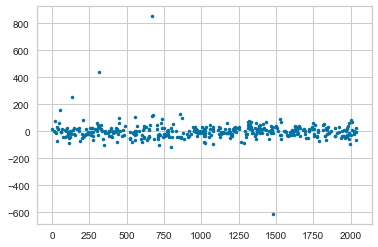

In [211]:
predtest = np.array(y_test).ravel() - fit2.predict(X_test)
plt.plot(predtest, '.')



#### OLS - X, y - ALL variables, Log_price used as Y value)

In [220]:
listingdf2['log_price'] = listingdf2['f_price']
listingdf2['log_price'] = np.log(listingdf2.log_price)

In [229]:
## ALL VARIABLES -> after log price powertransformation
X = listingdf2.iloc[:,:-2]
y = listingdf2.iloc[:,-1:]

#y, X = patsy.dmatrices('log_price ~ host_response_rate + host_acceptance_rate + accommodates + bathrooms + bedrooms + beds + cleaning_fee + guests_included + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable_f + instant_bookable_t + bed_type_Airbed + bed_type_Couch + bed_type_Futon + bed_type_Pull_outSofa + bed_type_RealBed + room_type_Entirehome_apt + room_type_Privateroom + room_type_Sharedroom + property_type_Apartment + property_type_Bed_Breakfast + property_type_Boat + property_type_Bungalow + property_type_Cabin + property_type_Camper_RV + property_type_Chalet + property_type_Condominium + property_type_Dorm + property_type_House + property_type_Loft + property_type_Other + property_type_Townhouse + property_type_Yurt + neighbourhood_cleansed_Adams + neighbourhood_cleansed_Alki + neighbourhood_cleansed_ArborHeights + neighbourhood_cleansed_Atlantic + neighbourhood_cleansed_Belltown + neighbourhood_cleansed_BitterLake + neighbourhood_cleansed_Briarcliff + neighbourhood_cleansed_Brighton + neighbourhood_cleansed_Broadview + neighbourhood_cleansed_Broadway + neighbourhood_cleansed_Bryant + neighbourhood_cleansed_CedarPark + neighbourhood_cleansed_CentralBusinessDistrict + neighbourhood_cleansed_ColumbiaCity + neighbourhood_cleansed_CrownHill + neighbourhood_cleansed_Dunlap + neighbourhood_cleansed_EastQueenAnne + neighbourhood_cleansed_Eastlake + neighbourhood_cleansed_FairmountPark + neighbourhood_cleansed_Fauntleroy + neighbourhood_cleansed_FirstHill + neighbourhood_cleansed_Fremont + neighbourhood_cleansed_Gatewood + neighbourhood_cleansed_Genesee + neighbourhood_cleansed_Georgetown + neighbourhood_cleansed_GreenLake + neighbourhood_cleansed_Greenwood + neighbourhood_cleansed_HallerLake + neighbourhood_cleansed_Harrison_Denny_Blaine + neighbourhood_cleansed_HighPoint + neighbourhood_cleansed_HighlandPark + neighbourhood_cleansed_Interbay + neighbourhood_cleansed_InternationalDistrict + neighbourhood_cleansed_Laurelhurst + neighbourhood_cleansed_LawtonPark + neighbourhood_cleansed_Leschi + neighbourhood_cleansed_LowerQueenAnne + neighbourhood_cleansed_LoyalHeights + neighbourhood_cleansed_MadisonPark + neighbourhood_cleansed_Madrona + neighbourhood_cleansed_Mann + neighbourhood_cleansed_MapleLeaf + neighbourhood_cleansed_MatthewsBeach + neighbourhood_cleansed_Meadowbrook + neighbourhood_cleansed_Mid_BeaconHill + neighbourhood_cleansed_Minor + neighbourhood_cleansed_Montlake + neighbourhood_cleansed_MountBaker + neighbourhood_cleansed_NorthAdmiral + neighbourhood_cleansed_NorthBeach_BlueRidge + neighbourhood_cleansed_NorthBeaconHill + neighbourhood_cleansed_NorthCollegePark + neighbourhood_cleansed_NorthDelridge + neighbourhood_cleansed_NorthQueenAnne + neighbourhood_cleansed_OlympicHills + neighbourhood_cleansed_PhinneyRidge + neighbourhood_cleansed_Pike_Market + neighbourhood_cleansed_Pinehurst + neighbourhood_cleansed_PioneerSquare + neighbourhood_cleansed_PortageBay + neighbourhood_cleansed_RainierBeach + neighbourhood_cleansed_Ravenna + neighbourhood_cleansed_Riverview + neighbourhood_cleansed_Roosevelt + neighbourhood_cleansed_Seaview + neighbourhood_cleansed_SewardPark + neighbourhood_cleansed_SouthBeaconHill + neighbourhood_cleansed_SouthDelridge + neighbourhood_cleansed_SouthLakeUnion + neighbourhood_cleansed_SouthPark + neighbourhood_cleansed_SoutheastMagnolia + neighbourhood_cleansed_Stevens + neighbourhood_cleansed_SunsetHill + neighbourhood_cleansed_UniversityDistrict + neighbourhood_cleansed_VictoryHeights + neighbourhood_cleansed_ViewRidge + neighbourhood_cleansed_Wallingford + neighbourhood_cleansed_Wedgwood + neighbourhood_cleansed_WestQueenAnne + neighbourhood_cleansed_WestWoodland + neighbourhood_cleansed_Westlake + neighbourhood_cleansed_WhittierHeights + neighbourhood_cleansed_Windermere + neighbourhood_cleansed_YeslerTerrace + host_is_superhost_f + host_is_superhost_t + neighbourhood_cleansed_Adams + neighbourhood_cleansed_Alki + neighbourhood_cleansed_ArborHeights + neighbourhood_cleansed_Atlantic + neighbourhood_cleansed_Belltown + neighbourhood_cleansed_BitterLake + neighbourhood_cleansed_Briarcliff + neighbourhood_cleansed_Brighton + neighbourhood_cleansed_Broadview + neighbourhood_cleansed_Broadway + neighbourhood_cleansed_Bryant + neighbourhood_cleansed_CedarPark + neighbourhood_cleansed_CentralBusinessDistrict + neighbourhood_cleansed_ColumbiaCity + neighbourhood_cleansed_CrownHill + neighbourhood_cleansed_Dunlap + neighbourhood_cleansed_EastQueenAnne + neighbourhood_cleansed_Eastlake + neighbourhood_cleansed_FairmountPark + neighbourhood_cleansed_Fauntleroy + neighbourhood_cleansed_FirstHill + neighbourhood_cleansed_Fremont + neighbourhood_cleansed_Gatewood + neighbourhood_cleansed_Genesee + neighbourhood_cleansed_Georgetown + neighbourhood_cleansed_GreenLake + neighbourhood_cleansed_Greenwood + neighbourhood_cleansed_HallerLake + neighbourhood_cleansed_Harrison_Denny_Blaine + neighbourhood_cleansed_HighPoint + neighbourhood_cleansed_HighlandPark + neighbourhood_cleansed_Interbay + neighbourhood_cleansed_InternationalDistrict + neighbourhood_cleansed_Laurelhurst + neighbourhood_cleansed_LawtonPark + neighbourhood_cleansed_Leschi + neighbourhood_cleansed_LowerQueenAnne + neighbourhood_cleansed_LoyalHeights + neighbourhood_cleansed_MadisonPark + neighbourhood_cleansed_Madrona + neighbourhood_cleansed_Mann + neighbourhood_cleansed_MapleLeaf + neighbourhood_cleansed_MatthewsBeach + neighbourhood_cleansed_Meadowbrook + neighbourhood_cleansed_Mid_BeaconHill + neighbourhood_cleansed_Minor + neighbourhood_cleansed_Montlake + neighbourhood_cleansed_MountBaker + neighbourhood_cleansed_NorthAdmiral + neighbourhood_cleansed_NorthBeach_BlueRidge + neighbourhood_cleansed_NorthBeaconHill + neighbourhood_cleansed_NorthCollegePark + neighbourhood_cleansed_NorthDelridge + neighbourhood_cleansed_NorthQueenAnne + neighbourhood_cleansed_OlympicHills + neighbourhood_cleansed_PhinneyRidge + neighbourhood_cleansed_Pike_Market + neighbourhood_cleansed_Pinehurst + neighbourhood_cleansed_PioneerSquare + neighbourhood_cleansed_PortageBay + neighbourhood_cleansed_RainierBeach + neighbourhood_cleansed_Ravenna + neighbourhood_cleansed_Riverview + neighbourhood_cleansed_Roosevelt + neighbourhood_cleansed_Seaview + neighbourhood_cleansed_SewardPark + neighbourhood_cleansed_SouthBeaconHill + neighbourhood_cleansed_SouthDelridge + neighbourhood_cleansed_SouthLakeUnion + neighbourhood_cleansed_SouthPark + neighbourhood_cleansed_SoutheastMagnolia + neighbourhood_cleansed_Stevens + neighbourhood_cleansed_SunsetHill + neighbourhood_cleansed_UniversityDistrict + neighbourhood_cleansed_VictoryHeights + neighbourhood_cleansed_ViewRidge + neighbourhood_cleansed_Wallingford + neighbourhood_cleansed_Wedgwood + neighbourhood_cleansed_WestQueenAnne + neighbourhood_cleansed_WestWoodland + neighbourhood_cleansed_Westlake + neighbourhood_cleansed_WhittierHeights + neighbourhood_cleansed_Windermere + neighbourhood_cleansed_YeslerTerrace + host_response_time_afewdaysormore + host_response_time_withinaday + host_response_time_withinafewhours + host_response_time_withinanhour + cancellation_policy_flexible + cancellation_policy_moderate + cancellation_policy_strict', data=listingdf2, return_type="dataframe")
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     48.70
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:35:11   Log-Likelihood:                -169.15
No. Observations:                2042   AIC:                             594.3
Df Residuals:                    1914   BIC:                             1314.
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
host_response_rate                                -0.0007      0.001     -0.824      0.410      -0.002       0.001
host_acceptance_rate                              -0.0071      0.003     -2.511      0.012      -0.013      -0.002
accommodates                                       0.0378      0.007      5.162      0.000       0.023       0.052
bathrooms                                          0.0789      0.016      4.980      0.000       0.048       0.110
bedrooms                                           0.1359      0.013     10.191      0.000       0.110       0.162
beds                                              -0.0119      0.011     -1.106      0.269      -0.033       0.009
cleaning_fee                                       0.0020      0.000      9.706      0.000       0.002       0.002
guests_included                                    0.0225      0.005      4.131      0.000       0.012       0.033
minimum_nights                                     0.0001      0.000      0.544      0.586      -0.000       0.001
maximum_nights                                 -1.884e-05   1.28e-05     -1.472      0.141   -4.39e-05    6.26e-06
number_of_reviews                                 -0.0007      0.000     -3.744      0.000      -0.001      -0.000
review_scores_rating                               0.0068      0.002      4.167      0.000       0.004       0.010
review_scores_accuracy                             0.0085      0.012      0.708      0.479      -0.015       0.032
review_scores_cleanliness                         -0.0026      0.011     -0.226      0.821      -0.025       0.020
review_scores_checkin                              0.0060      0.015      0.410      0.682      -0.023       0.035
review_scores_communication                       -0.0052      0.017     -0.314      0.754      -0.038       0.027
review_scores_location                             0.0200      0.013      1.579      0.114      -0.005       0.045
review_scores_value                               -0.0664      0.012     -5.331      0.000      -0.091      -0.042
instant_bookable_f                                 1.0121      0.076     13.308      0.000       0.863       1.161
instant_bookable_t                                 0.9875      0.076     13.035      0.000       0.839       1.136
bed_type_Airbed                                    0.4325      0.089      4.840      0.000       0.257       0.608
bed_type_Couch                                     0.3148      0.144      2.194      0.028       0.033       0.596
bed_type_Futon                                     0.4297      0.066      6.462      0.000       0.299       0.560
bed_type_Pull_outSofa                              0.3507      0.063      5.578      0.000   

#### OLS - X6, y6 - Selected variables, Log_price used as Y value
 - Based on review of feature

In [233]:
subdrop = ['log_price','host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'review_scores_rating', 'review_scores_location', 'review_scores_value', 'instant_bookable_f', 'instant_bookable_t', 'room_type_Entirehome_apt', 'room_type_Privateroom', 'room_type_Sharedroom', 'property_type_Apartment', 'property_type_Bed_Breakfast', 'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper_RV', 'property_type_Chalet', 'property_type_Condominium', 'property_type_Dorm', 'property_type_House', 'property_type_Loft', 'property_type_Other', 'property_type_Townhouse', 'property_type_Yurt', 'host_is_superhost_f', 'host_is_superhost_t', 'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict','neighbourhood_cleansed_Adams', 'neighbourhood_cleansed_Alki', 'neighbourhood_cleansed_ArborHeights', 'neighbourhood_cleansed_Atlantic', 'neighbourhood_cleansed_Belltown', 'neighbourhood_cleansed_BitterLake', 'neighbourhood_cleansed_Briarcliff', 'neighbourhood_cleansed_Brighton', 'neighbourhood_cleansed_Broadview', 'neighbourhood_cleansed_Broadway', 'neighbourhood_cleansed_Bryant', 'neighbourhood_cleansed_CedarPark', 'neighbourhood_cleansed_CentralBusinessDistrict', 'neighbourhood_cleansed_ColumbiaCity', 'neighbourhood_cleansed_CrownHill', 'neighbourhood_cleansed_Dunlap', 'neighbourhood_cleansed_EastQueenAnne', 'neighbourhood_cleansed_Eastlake', 'neighbourhood_cleansed_FairmountPark', 'neighbourhood_cleansed_Fauntleroy', 'neighbourhood_cleansed_FirstHill', 'neighbourhood_cleansed_Fremont', 'neighbourhood_cleansed_Gatewood', 'neighbourhood_cleansed_Genesee', 'neighbourhood_cleansed_Georgetown', 'neighbourhood_cleansed_GreenLake', 'neighbourhood_cleansed_Greenwood', 'neighbourhood_cleansed_HallerLake', 'neighbourhood_cleansed_Harrison_Denny_Blaine', 'neighbourhood_cleansed_HighPoint', 'neighbourhood_cleansed_HighlandPark', 'neighbourhood_cleansed_Interbay', 'neighbourhood_cleansed_InternationalDistrict', 'neighbourhood_cleansed_Laurelhurst', 'neighbourhood_cleansed_LawtonPark', 'neighbourhood_cleansed_Leschi', 'neighbourhood_cleansed_LowerQueenAnne', 'neighbourhood_cleansed_LoyalHeights', 'neighbourhood_cleansed_MadisonPark', 'neighbourhood_cleansed_Madrona', 'neighbourhood_cleansed_Mann', 'neighbourhood_cleansed_MapleLeaf', 'neighbourhood_cleansed_MatthewsBeach', 'neighbourhood_cleansed_Meadowbrook', 'neighbourhood_cleansed_Mid_BeaconHill', 'neighbourhood_cleansed_Minor', 'neighbourhood_cleansed_Montlake', 'neighbourhood_cleansed_MountBaker', 'neighbourhood_cleansed_NorthAdmiral', 'neighbourhood_cleansed_NorthBeach_BlueRidge', 'neighbourhood_cleansed_NorthBeaconHill', 'neighbourhood_cleansed_NorthCollegePark', 'neighbourhood_cleansed_NorthDelridge', 'neighbourhood_cleansed_NorthQueenAnne', 'neighbourhood_cleansed_OlympicHills', 'neighbourhood_cleansed_PhinneyRidge', 'neighbourhood_cleansed_Pike_Market', 'neighbourhood_cleansed_Pinehurst', 'neighbourhood_cleansed_PioneerSquare', 'neighbourhood_cleansed_PortageBay', 'neighbourhood_cleansed_RainierBeach', 'neighbourhood_cleansed_Ravenna', 'neighbourhood_cleansed_Riverview', 'neighbourhood_cleansed_Roosevelt', 'neighbourhood_cleansed_Seaview', 'neighbourhood_cleansed_SewardPark', 'neighbourhood_cleansed_SouthBeaconHill', 'neighbourhood_cleansed_SouthDelridge', 'neighbourhood_cleansed_SouthLakeUnion', 'neighbourhood_cleansed_SouthPark', 'neighbourhood_cleansed_SoutheastMagnolia', 'neighbourhood_cleansed_Stevens', 'neighbourhood_cleansed_SunsetHill', 'neighbourhood_cleansed_UniversityDistrict', 'neighbourhood_cleansed_VictoryHeights', 'neighbourhood_cleansed_ViewRidge', 'neighbourhood_cleansed_Wallingford', 'neighbourhood_cleansed_Wedgwood', 'neighbourhood_cleansed_WestQueenAnne', 'neighbourhood_cleansed_WestWoodland', 'neighbourhood_cleansed_Westlake', 'neighbourhood_cleansed_WhittierHeights', 'neighbourhood_cleansed_Windermere', 'neighbourhood_cleansed_YeslerTerrace']           
           
listingdfreview = listingdf2[subdrop]
X6 = listingdfreview.iloc[:,1:]
y6 = listingdfreview.iloc[:,:1]

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state = 123, test_size=0.2)

In [234]:
model = sm.OLS(y6,X6)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     51.27
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:41:12   Log-Likelihood:                -247.01
No. Observations:                2042   AIC:                             716.0
Df Residuals:                    1931   BIC:                             1340.
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
host_response_rate                                -0.0021      0.001     -3.304      0.001      -0.003      -0.001
accommodates                                       0.0495      0.006      8.661      0.000       0.038       0.061
bathrooms                                          0.1110      0.016      6.970      0.000       0.080       0.142
bedrooms                                           0.1640      0.013     12.452      0.000       0.138       0.190
number_of_reviews                                 -0.0008      0.000     -4.621      0.000      -0.001      -0.000
review_scores_rating                               0.0078      0.001      5.525      0.000       0.005       0.011
review_scores_location                             0.0153      0.013      1.180      0.238      -0.010       0.041
review_scores_value                               -0.0734      0.013     -5.863      0.000      -0.098      -0.049
instant_bookable_f                                 1.1285      0.043     26.541      0.000       1.045       1.212
instant_bookable_t                                 1.0797      0.044     24.335      0.000       0.993       1.167
room_type_Entirehome_apt                           1.1582      0.033     34.681      0.000       1.093       1.224
room_type_Privateroom                              0.7052      0.033     21.427      0.000       0.641       0.770
room_type_Sharedroom                               0.3447      0.041      8.351      0.000       0.264       0.426
property_type_Apartment                            0.0952      0.046      2.052      0.040       0.004       0.186
property_type_Bed_Breakfast                        0.1695      0.090      1.885      0.060      -0.007       0.346
property_type_Boat                                 0.9352      0.326      2.868      0.004       0.296       1.575
property_type_Bungalow                             0.2622      0.105      2.504      0.012       0.057       0.467
property_type_Cabin                                0.1589      0.090      1.772      0.076      -0.017       0.335
property_type_Camper_RV                           -0.0723      0.105     -0.688      0.492      -0.278       0.134
property_type_Chalet                               0.2501      0.270      0.928      0.354      -0.279       0.779
property_type_Condominium                          0.1056      0.060      1.764      0.078      -0.012       0.223
property_type_Dorm                                -0.4712      0.279     -1.688      0.092      -1.019       0.076
property_type_House                                0.1688      0.046      3.638      0.000       0.078       0.260
property_type_Loft                                 0.3015      0.073      4.121      0.000   

In [132]:
model = sm.OLS(y6_train,X6_train)
fit6 = model.fit()
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     42.25
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        16:51:34   Log-Likelihood:                -170.85
No. Observations:                1633   AIC:                             561.7
Df Residuals:                    1523   BIC:                             1156.
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
host_response_rate                                -0.0021      0.001     -2.915      0.004      -0.003      -0.001
accommodates                                       0.0462      0.006      7.277      0.000       0.034       0.059
bathrooms                                          0.1004      0.018      5.679      0.000       0.066       0.135
bedrooms                                           0.1728      0.015     11.732      0.000       0.144       0.202
number_of_reviews                                 -0.0010      0.000     -4.996      0.000      -0.001      -0.001
review_scores_rating                               0.0077      0.002      4.940      0.000       0.005       0.011
review_scores_location                             0.0112      0.015      0.764      0.445      -0.018       0.040
review_scores_value                               -0.0574      0.014     -4.073      0.000      -0.085      -0.030
instant_bookable_f                                 1.0777      0.046     23.454      0.000       0.988       1.168
instant_bookable_t                                 1.0368      0.048     21.563      0.000       0.942       1.131
room_type_Entirehome_apt                           1.1551      0.037     31.533      0.000       1.083       1.227
room_type_Privateroom                              0.6929      0.036     19.128      0.000       0.622       0.764
room_type_Sharedroom                               0.2665      0.046      5.733      0.000       0.175       0.358
property_type_Apartment                            0.1401      0.044      3.213      0.001       0.055       0.226
property_type_Bed_Breakfast                        0.2852      0.100      2.865      0.004       0.090       0.481
property_type_Boat                              3.633e-15   1.32e-15      2.754      0.006    1.05e-15    6.22e-15
property_type_Bungalow                             0.3166      0.108      2.920      0.004       0.104       0.529
property_type_Cabin                                0.2340      0.091      2.563      0.010       0.055       0.413
property_type_Camper_RV                           -0.0324      0.109     -0.297      0.766      -0.246       0.182
property_type_Chalet                               0.3017      0.266      1.136      0.256      -0.219       0.823
property_type_Condominium                          0.1484      0.059      2.503      0.012       0.032       0.265
property_type_Dorm                                -0.3653      0.278     -1.314      0.189      -0.911       0.180
property_type_House                                0.2217      0.044      5.032      0.000       0.135       0.308
property_type_Loft                                 0.3677      0.073      5.048      0.000   

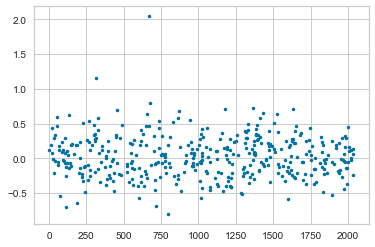

In [133]:
predtest = np.array(y6_test).ravel() - fit6.predict(X6_test)
plt.plot(predtest, '.')


#### ElasticNet - X6, y6 - Selected variables, Log_price used as Y value

- Tried polynomial features from degree 1 - 3, the result drop significantly once it's applied

In [144]:
est = make_pipeline(StandardScaler(), ElasticNetCV(cv=5))

est.fit(X6_train, y6_train)

ypredict = est.predict(X6_test)

mae = mean_absolute_error(ypredict, y6_test)
rmse = sqrt(mae)

print(mae)

print(np.exp(rmse))

print(rmse)

print(r2_score(ypredict, y6_test))

0.2332564938532252
1.6208753593242853
0.48296634857226356
0.5734841990790864


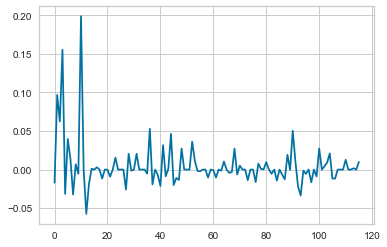

In [145]:
a= est.named_steps.elasticnetcv.coef_
plt.plot(a)

In [255]:
a= est.named_steps.elasticnetcv.coef_
print(len(a))

y = np.trim_zeros(est.named_steps.elasticnetcv.coef_)
print(len(y))



116
116


array([-1.70083207e-02,  9.67513542e-02,  6.23621131e-02,  1.55337092e-01,
       -3.14872971e-02,  3.97079142e-02,  1.39730087e-02, -3.23608951e-02,
        6.82184758e-03, -5.40479780e-03,  1.98765775e-01, -0.00000000e+00,
       -5.75068341e-02, -1.87973017e-02,  9.86778700e-04,  0.00000000e+00,
        2.94977711e-03,  0.00000000e+00, -1.16819310e-02,  0.00000000e+00,
       -1.24246909e-04, -9.18412591e-03,  0.00000000e+00,  1.54935203e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -2.58785911e-02,
        2.04419396e-02, -1.47097849e-03, -0.00000000e+00,  2.05050935e-02,
       -0.00000000e+00,  1.32393158e-05,  0.00000000e+00, -5.27209377e-03,
        5.28109302e-02, -1.92742847e-02, -3.31010711e-05, -6.94226396e-03,
       -2.12966614e-02,  3.16842388e-02, -8.74554356e-03,  1.14683007e-03,
        4.62634324e-02, -2.00381468e-02, -1.09144185e-02, -1.33989650e-02,
        2.73506540e-02, -0.00000000e+00, -0.00000000e+00,  4.44031603e-05,
        3.62124772e-02,  

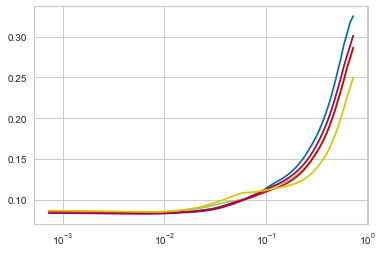

In [146]:
plt.plot(est.named_steps.elasticnetcv.alphas_, est.named_steps.elasticnetcv.mse_path_)
plt.xscale('log')


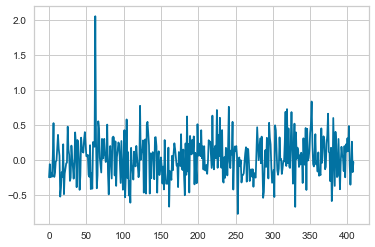

In [147]:
resid = np.array(y6_test).ravel() - est.predict(X6_test)
plt.plot(resid)


In [181]:
np.argsort(resid)


array([253, 330, 161, 109, 379, 287, 102, 302,  15, 107, 182,  80,  20,
       130, 135, 145, 127, 188, 288, 345,  41,  99, 247, 154, 390,  56,
        58,  64,  16,  37, 173, 274, 383,  90, 404, 195, 159, 157, 327,
       152, 198, 158, 340,  96, 299, 234, 258, 380, 265, 377, 269, 108,
        28, 233, 164, 113, 141,  33,  84, 294, 137, 105, 236, 277,  29,
       397,   0,   2, 120,  18, 386,   7,  54, 300, 276,   4, 272, 181,
       387, 362,  42,  88, 239,  65, 259, 364, 148, 260,  53, 307, 184,
       270, 312, 163, 212,  21, 103, 261,   3,  79, 363, 275,  57, 156,
        70,   8,  17, 407, 360, 186, 395, 162, 112, 210, 121, 306, 166,
       209, 179, 301, 207, 221, 271, 370, 273, 313, 308, 149,  22, 178,
       243, 323, 218, 226, 231, 298, 405,  32, 371, 335, 291, 322, 153,
       355, 197, 116, 256, 176, 318, 151, 119, 171, 211,  69, 343, 289,
       111, 337, 403, 389, 358, 172,   1, 354,  98, 115, 342, 100,  23,
        95, 268, 284, 286,  83, 320, 175, 254, 366,  24,  81,  3

In [180]:
print(X6_test.loc[670].T)
print(np.exp(y6_test[62:63]))

print(X6_test.loc[315].T)
print(np.exp(y6_test[352:353]))

print(X6_test.loc[678].T)
print(np.exp(y6_test[122:123]))

print(X6_test.loc[1175].T)
print(np.exp(y6_test[241:242]))

print(X6_test.loc[1368].T)
print(np.exp(y6_test[319:320]))

print(X6_test.loc[868].T)
print(np.exp(y6_test[225:226]))

print(X6_test.loc[452].T)
print(np.exp(y6_test[317:318]))

print(X6_test.loc[1636].T)
print(np.exp(y6_test[325:326]))

print(X6_test.loc[132].T)
print(np.exp(y6_test[374:375]))

print(X6_test.loc[860].T)
print(np.exp(y6_test[219:220]))

host_response_rate                           100.0
accommodates                                   4.0
bathrooms                                      1.0
bedrooms                                       1.0
number_of_reviews                             54.0
review_scores_rating                          94.0
review_scores_location                        10.0
review_scores_value                            9.0
instant_bookable_f                             1.0
instant_bookable_t                             0.0
room_type_Entirehome_apt                       1.0
room_type_Privateroom                          0.0
room_type_Sharedroom                           0.0
property_type_Apartment                        1.0
property_type_Bed_Breakfast                    0.0
property_type_Boat                             0.0
property_type_Bungalow                         0.0
property_type_Cabin                            0.0
property_type_Camper_RV                        0.0
property_type_Chalet           

In [27]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05


fill = {'colname':listingdf2.columns[:-2], 'coefval':fit.params[1:], 'pval':fit.pvalues[1:]}
coefdf = pd.DataFrame.from_dict(fill, orient='index').T
coefdf

,colname,coefval,pval
0,host_response_rate,-0.000663583,0.410294
1,host_acceptance_rate,-0.00711829,0.0121171
2,accommodates,0.0378431,2.69849e-07
3,bathrooms,0.0788894,6.93141e-07
4,bedrooms,0.135918,8.74095e-24
5,beds,-0.0119345,0.268805
6,cleaning_fee,0.00202324,8.91747e-22
7,guests_included,0.0225433,3.76133e-05
8,minimum_nights,0.000148795,0.586284
9,maximum_nights,-1.88427e-05,0.141131


In [28]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05

newcoef = coefdf[coefdf.pval < 0.05]
names = pd.Series(newcoef['colname']).values

list = []
for i in names:
    list.append(i)

list = "', '".join(list)
print(list)


host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee', 'guests_included', 'number_of_reviews', 'review_scores_rating', 'review_scores_value', 'instant_bookable_f', 'instant_bookable_t', 'bed_type_Airbed', 'bed_type_Futon', 'bed_type_Pull_outSofa', 'bed_type_RealBed', 'room_type_Entirehome_apt', 'room_type_Privateroom', 'room_type_Sharedroom', 'property_type_Boat', 'property_type_Loft', 'neighbourhood_cleansed_ArborHeights', 'neighbourhood_cleansed_Atlantic', 'neighbourhood_cleansed_BitterLake', 'neighbourhood_cleansed_Briarcliff', 'neighbourhood_cleansed_Brighton', 'neighbourhood_cleansed_Bryant', 'neighbourhood_cleansed_CedarPark', 'neighbourhood_cleansed_ColumbiaCity', 'neighbourhood_cleansed_CrownHill', 'neighbourhood_cleansed_FairmountPark', 'neighbourhood_cleansed_Fauntleroy', 'neighbourhood_cleansed_HallerLake', 'neighbourhood_cleansed_HighlandPark', 'neighbourhood_cleansed_LawtonPark', 'neighbourhood_cleansed_LowerQueenAnne', 'neighbourhood_cleansed_Matt

In [42]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05

subdrop = ['log_price', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee', 'guests_included', 'number_of_reviews', 'review_scores_rating', 'review_scores_value', 'instant_bookable_f', 'instant_bookable_t', 'bed_type_Airbed', 'bed_type_Futon', 'bed_type_Pull_outSofa', 'bed_type_RealBed', 'room_type_Entirehome_apt', 'room_type_Privateroom', 'room_type_Sharedroom', 'property_type_Boat', 'property_type_Loft', 'neighbourhood_cleansed_ArborHeights', 'neighbourhood_cleansed_Atlantic', 'neighbourhood_cleansed_BitterLake', 'neighbourhood_cleansed_Briarcliff', 'neighbourhood_cleansed_Brighton', 'neighbourhood_cleansed_Bryant', 'neighbourhood_cleansed_CedarPark', 'neighbourhood_cleansed_ColumbiaCity', 'neighbourhood_cleansed_CrownHill', 'neighbourhood_cleansed_FairmountPark', 'neighbourhood_cleansed_Fauntleroy', 'neighbourhood_cleansed_HallerLake', 'neighbourhood_cleansed_HighlandPark', 'neighbourhood_cleansed_LawtonPark', 'neighbourhood_cleansed_LowerQueenAnne', 'neighbourhood_cleansed_MatthewsBeach', 'neighbourhood_cleansed_Meadowbrook', 'neighbourhood_cleansed_Montlake', 'neighbourhood_cleansed_NorthBeaconHill', 'neighbourhood_cleansed_NorthQueenAnne', 'neighbourhood_cleansed_OlympicHills', 'neighbourhood_cleansed_Pike_Market', 'neighbourhood_cleansed_Pinehurst', 'neighbourhood_cleansed_PioneerSquare', 'neighbourhood_cleansed_PortageBay', 'neighbourhood_cleansed_SouthBeaconHill', 'neighbourhood_cleansed_SouthLakeUnion', 'neighbourhood_cleansed_SouthPark', 'neighbourhood_cleansed_SoutheastMagnolia', 'neighbourhood_cleansed_Stevens', 'neighbourhood_cleansed_SunsetHill', 'neighbourhood_cleansed_Wallingford', 'neighbourhood_cleansed_WhittierHeights', 'neighbourhood_cleansed_Windermere', 'neighbourhood_cleansed_YeslerTerrace', 'host_response_time_afewdaysormore', 'host_response_time_withinaday', 'host_response_time_withinafewhours', 'host_response_time_withinanhour', 'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict']

listingdfdropp = listingdf2[subdrop]
X5 = listingdfdropp.iloc[:,1:]
y5 = listingdfdropp.iloc[:,:1]

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state = 123, test_size=0.2)

In [43]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05

model = sm.OLS(y5,X5)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     84.21
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        16:08:41   Log-Likelihood:                -373.81
No. Observations:                2042   AIC:                             865.6
Df Residuals:                    1983   BIC:                             1197.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
host_acceptance_rate                        -0.0072      0.003     -2.338      0.019      -0.013      -0.001
accommodates                                 0.0317      0.006      5.140      0.000       0.020       0.044
bathrooms                                    0.0993      0.016      6.059      0.000       0.067       0.131
bedrooms                                     0.1038      0.013      7.794      0.000       0.078       0.130
cleaning_fee                                 0.0025      0.000     11.582      0.000       0.002       0.003
guests_included                              0.0198      0.006      3.454      0.001       0.009       0.031
number_of_reviews                           -0.0003      0.000     -1.607      0.108      -0.001    6.37e-05
review_scores_rating                         0.0117      0.001      8.153      0.000       0.009       0.014
review_scores_value                         -0.0696      0.013     -5.550      0.000      -0.094      -0.045
instant_bookable_f                           1.4181      0.133     10.701      0.000       1.158       1.678
instant_bookable_t                           1.3840      0.132     10.489      0.000       1.125       1.643
bed_type_Airbed                              0.1657      0.202      0.819      0.413      -0.231       0.562
bed_type_Futon                               0.2097      0.187      1.119      0.263      -0.158       0.577
bed_type_Pull_outSofa                        0.1422      0.188      0.754      0.451      -0.228       0.512
bed_type_RealBed                             0.2325      0.178      1.303      0.193      -0.117       0.582
room_type_Entirehome_apt                     1.3183      0.093     14.163      0.000       1.136       1.501
room_type_Privateroom                        0.8992      0.093      9.648      0.000       0.716       1.082
room_type_Sharedroom                         0.5846      0.087      6.748      0.000       0.415       0.754
property_type_Boat                           0.8157      0.298      2.739      0.006       0.232       1.400
property_type_Loft                           0.2215      0.065      3.430      0.001       0.095       0.348
neighbourhood_cleansed_ArborHeights         -0.1660      0.209     -0.794      0.428      -0.576       0.244
neighbourhood_cleansed_Atlantic             -0.0821      0.059     -1.399      0.162      -0.197       0.033
neighbourhood_cleansed_BitterLake           -0.4426      0.112     -3.954      0.000      -0.662      -0.223
neighbourhood_cleansed_Briarcliff           -0.0219      0.101     -0.217      0.828      -0.220       0.176
neighbourhood_cleansed_Brighton             -0.3098      0.094     -3.289      0.001      -0.495      -0.125
neighbourhood_cleansed_Bryant  

In [44]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05

##### ElasticNet

degree = 1

est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV(cv=5))
est.fit(X5_train, y5_train)
ypredict = est.predict(X5_test)

mae = mean_absolute_error(ypredict, y5_test)
rmse = sqrt(mae)
percentageofmean = float(rmse/listingdfdropp.log_price.mean())

print(np.exp(rmse))
print(mae)
print(rmse)
print(percentageofmean)
print(r2_score(ypredict, y5_test))
print(est.named_steps.elasticnetcv)

1.6771038281792128
0.26735972404393205
0.5170683939711768
0.10975418061745613
0.3071571565236916
ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)


In [45]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05

##### ElasticNet


est = make_pipeline(StandardScaler(), ElasticNetCV(cv=5))


est.fit(X5_train, y5_train)
ypredict = est.predict(X5_test)

mae = mean_absolute_error(ypredict, y5_test)
rmse = sqrt(mae)
percentageofmean = float(rmse/listingdfdropp.log_price.mean())

print(np.exp(rmse))
print(mae)
print(rmse)
print(percentageofmean)
print(r2_score(ypredict, y5_test))


1.6440101303734658
0.2471466470615983
0.49713845864265854
0.10552380462224041
0.4958405216345635


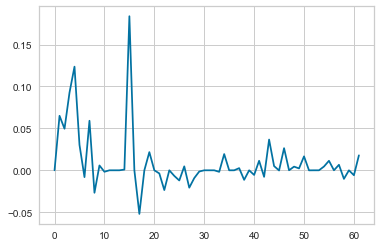

In [46]:
a= est.named_steps.elasticnetcv.coef_
plt.plot(a)

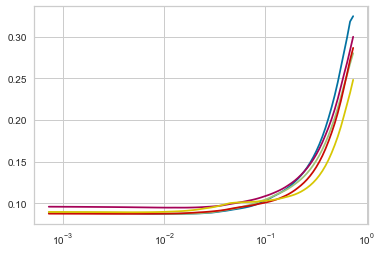

In [47]:

plt.plot(est.named_steps.elasticnetcv.alphas_, est.named_steps.elasticnetcv.mse_path_)
plt.xscale('log')

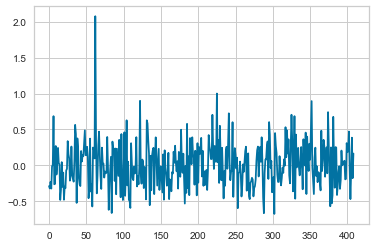

In [49]:
y5_test.shape
#X5_test.shape

resid = np.array(y5_test).ravel() - est.predict(X5_test)
plt.plot(resid)


# np.argmax(resid)
# np.argsort()

In [41]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05

newcoef = coefdf
names = pd.Series(newcoef['colname']).values

list = []
for i in names:
    list.append(i)

list = "', '".join(list)
print(list)

host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable_f', 'instant_bookable_t', 'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull_outSofa', 'bed_type_RealBed', 'room_type_Entirehome_apt', 'room_type_Privateroom', 'room_type_Sharedroom', 'property_type_Apartment', 'property_type_Bed_Breakfast', 'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper_RV', 'property_type_Chalet', 'property_type_Condominium', 'property_type_Dorm', 'property_type_House', 'property_type_Loft', 'property_type_Other', 'property_type_Townhouse', 'property_type_Yurt', 'host_is_superhost_f', 'host_is_superhost_t', 'neighbourhood_

In [233]:
## ALL VARIABLES -> after log price powertransformation -> drop columns based on review 


#'host_acceptance_rate', 'minimum_nights', 'maximum_nights',
subdrop = ['log_price','host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'review_scores_rating', 'review_scores_location', 'review_scores_value', 'instant_bookable_f', 'instant_bookable_t', 'room_type_Entirehome_apt', 'room_type_Privateroom', 'room_type_Sharedroom', 'property_type_Apartment', 'property_type_Bed_Breakfast', 'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper_RV', 'property_type_Chalet', 'property_type_Condominium', 'property_type_Dorm', 'property_type_House', 'property_type_Loft', 'property_type_Other', 'property_type_Townhouse', 'property_type_Yurt', 'host_is_superhost_f', 'host_is_superhost_t', 'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict','neighbourhood_cleansed_Adams', 'neighbourhood_cleansed_Alki', 'neighbourhood_cleansed_ArborHeights', 'neighbourhood_cleansed_Atlantic', 'neighbourhood_cleansed_Belltown', 'neighbourhood_cleansed_BitterLake', 'neighbourhood_cleansed_Briarcliff', 'neighbourhood_cleansed_Brighton', 'neighbourhood_cleansed_Broadview', 'neighbourhood_cleansed_Broadway', 'neighbourhood_cleansed_Bryant', 'neighbourhood_cleansed_CedarPark', 'neighbourhood_cleansed_CentralBusinessDistrict', 'neighbourhood_cleansed_ColumbiaCity', 'neighbourhood_cleansed_CrownHill', 'neighbourhood_cleansed_Dunlap', 'neighbourhood_cleansed_EastQueenAnne', 'neighbourhood_cleansed_Eastlake', 'neighbourhood_cleansed_FairmountPark', 'neighbourhood_cleansed_Fauntleroy', 'neighbourhood_cleansed_FirstHill', 'neighbourhood_cleansed_Fremont', 'neighbourhood_cleansed_Gatewood', 'neighbourhood_cleansed_Genesee', 'neighbourhood_cleansed_Georgetown', 'neighbourhood_cleansed_GreenLake', 'neighbourhood_cleansed_Greenwood', 'neighbourhood_cleansed_HallerLake', 'neighbourhood_cleansed_Harrison_Denny_Blaine', 'neighbourhood_cleansed_HighPoint', 'neighbourhood_cleansed_HighlandPark', 'neighbourhood_cleansed_Interbay', 'neighbourhood_cleansed_InternationalDistrict', 'neighbourhood_cleansed_Laurelhurst', 'neighbourhood_cleansed_LawtonPark', 'neighbourhood_cleansed_Leschi', 'neighbourhood_cleansed_LowerQueenAnne', 'neighbourhood_cleansed_LoyalHeights', 'neighbourhood_cleansed_MadisonPark', 'neighbourhood_cleansed_Madrona', 'neighbourhood_cleansed_Mann', 'neighbourhood_cleansed_MapleLeaf', 'neighbourhood_cleansed_MatthewsBeach', 'neighbourhood_cleansed_Meadowbrook', 'neighbourhood_cleansed_Mid_BeaconHill', 'neighbourhood_cleansed_Minor', 'neighbourhood_cleansed_Montlake', 'neighbourhood_cleansed_MountBaker', 'neighbourhood_cleansed_NorthAdmiral', 'neighbourhood_cleansed_NorthBeach_BlueRidge', 'neighbourhood_cleansed_NorthBeaconHill', 'neighbourhood_cleansed_NorthCollegePark', 'neighbourhood_cleansed_NorthDelridge', 'neighbourhood_cleansed_NorthQueenAnne', 'neighbourhood_cleansed_OlympicHills', 'neighbourhood_cleansed_PhinneyRidge', 'neighbourhood_cleansed_Pike_Market', 'neighbourhood_cleansed_Pinehurst', 'neighbourhood_cleansed_PioneerSquare', 'neighbourhood_cleansed_PortageBay', 'neighbourhood_cleansed_RainierBeach', 'neighbourhood_cleansed_Ravenna', 'neighbourhood_cleansed_Riverview', 'neighbourhood_cleansed_Roosevelt', 'neighbourhood_cleansed_Seaview', 'neighbourhood_cleansed_SewardPark', 'neighbourhood_cleansed_SouthBeaconHill', 'neighbourhood_cleansed_SouthDelridge', 'neighbourhood_cleansed_SouthLakeUnion', 'neighbourhood_cleansed_SouthPark', 'neighbourhood_cleansed_SoutheastMagnolia', 'neighbourhood_cleansed_Stevens', 'neighbourhood_cleansed_SunsetHill', 'neighbourhood_cleansed_UniversityDistrict', 'neighbourhood_cleansed_VictoryHeights', 'neighbourhood_cleansed_ViewRidge', 'neighbourhood_cleansed_Wallingford', 'neighbourhood_cleansed_Wedgwood', 'neighbourhood_cleansed_WestQueenAnne', 'neighbourhood_cleansed_WestWoodland', 'neighbourhood_cleansed_Westlake', 'neighbourhood_cleansed_WhittierHeights', 'neighbourhood_cleansed_Windermere', 'neighbourhood_cleansed_YeslerTerrace']           
           
listingdfreview = listingdf2[subdrop]
X6 = listingdfreview.iloc[:,1:]
y6 = listingdfreview.iloc[:,:1]

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state = 123, test_size=0.2)

In [235]:
model = sm.OLS(y6,X6)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     51.27
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        13:37:25   Log-Likelihood:                -247.01
No. Observations:                2042   AIC:                             716.0
Df Residuals:                    1931   BIC:                             1340.
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
host_response_rate                                -0.0021      0.001     -3.304      0.001      -0.003      -0.001
accommodates                                       0.0495      0.006      8.661      0.000       0.038       0.061
bathrooms                                          0.1110      0.016      6.970      0.000       0.080       0.142
bedrooms                                           0.1640      0.013     12.452      0.000       0.138       0.190
number_of_reviews                                 -0.0008      0.000     -4.621      0.000      -0.001      -0.000
review_scores_rating                               0.0078      0.001      5.525      0.000       0.005       0.011
review_scores_location                             0.0153      0.013      1.180      0.238      -0.010       0.041
review_scores_value                               -0.0734      0.013     -5.863      0.000      -0.098      -0.049
instant_bookable_f                                 1.1285      0.043     26.541      0.000       1.045       1.212
instant_bookable_t                                 1.0797      0.044     24.335      0.000       0.993       1.167
room_type_Entirehome_apt                           1.1582      0.033     34.681      0.000       1.093       1.224
room_type_Privateroom                              0.7052      0.033     21.427      0.000       0.641       0.770
room_type_Sharedroom                               0.3447      0.041      8.351      0.000       0.264       0.426
property_type_Apartment                            0.0952      0.046      2.052      0.040       0.004       0.186
property_type_Bed_Breakfast                        0.1695      0.090      1.885      0.060      -0.007       0.346
property_type_Boat                                 0.9352      0.326      2.868      0.004       0.296       1.575
property_type_Bungalow                             0.2622      0.105      2.504      0.012       0.057       0.467
property_type_Cabin                                0.1589      0.090      1.772      0.076      -0.017       0.335
property_type_Camper_RV                           -0.0723      0.105     -0.688      0.492      -0.278       0.134
property_type_Chalet                               0.2501      0.270      0.928      0.354      -0.279       0.779
property_type_Condominium                          0.1056      0.060      1.764      0.078      -0.012       0.223
property_type_Dorm                                -0.4712      0.279     -1.688      0.092      -1.019       0.076
property_type_House                                0.1688      0.046      3.638      0.000       0.078       0.260
property_type_Loft                                 0.3015      0.073      4.121      0.000   

In [236]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05

##### ElasticNet


est = make_pipeline(StandardScaler(), ElasticNetCV(cv=5))


est.fit(X6_train, y6_train)
ypredict = est.predict(X6_test)

mae = mean_absolute_error(ypredict, y6_test)
rmse = sqrt(mae)
percentageofmean = float(rmse/listingdfreview.log_price.mean())

print(np.exp(rmse))
print(mae)
print(rmse)
print(percentageofmean)
print(r2_score(ypredict, y6_test))

1.6208753593242853
0.2332564938532252
0.48296634857226356
0.10251559846125176
0.5734841990790864


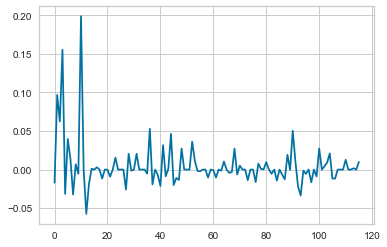

In [237]:
a= est.named_steps.elasticnetcv.coef_
plt.plot(a)

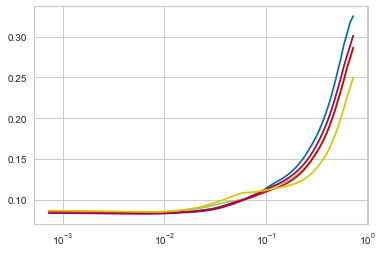

In [238]:

plt.plot(est.named_steps.elasticnetcv.alphas_, est.named_steps.elasticnetcv.mse_path_)
plt.xscale('log')

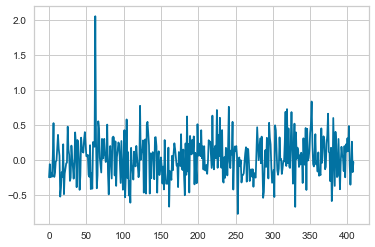

In [242]:


resid = np.array(y6_test).ravel() - est.predict(X6_test)
plt.plot(resid)


# np.argmax(resid)
# # np.argsort()

In [247]:
np.argmax(resid)


62

In [246]:
max(resid)

2.0551781346413973

In [244]:
np.argsort(resid)

array([253, 330, 161, 109, 379, 287, 102, 302,  15, 107, 182,  80,  20,
       130, 135, 145, 127, 188, 288, 345,  41,  99, 247, 154, 390,  56,
        58,  64,  16,  37, 173, 274, 383,  90, 404, 195, 159, 157, 327,
       152, 198, 158, 340,  96, 299, 234, 258, 380, 265, 377, 269, 108,
        28, 233, 164, 113, 141,  33,  84, 294, 137, 105, 236, 277,  29,
       397,   0,   2, 120,  18, 386,   7,  54, 300, 276,   4, 272, 181,
       387, 362,  42,  88, 239,  65, 259, 364, 148, 260,  53, 307, 184,
       270, 312, 163, 212,  21, 103, 261,   3,  79, 363, 275,  57, 156,
        70,   8,  17, 407, 360, 186, 395, 162, 112, 210, 121, 306, 166,
       209, 179, 301, 207, 221, 271, 370, 273, 313, 308, 149,  22, 178,
       243, 323, 218, 226, 231, 298, 405,  32, 371, 335, 291, 322, 153,
       355, 197, 116, 256, 176, 318, 151, 119, 171, 211,  69, 343, 289,
       111, 337, 403, 389, 358, 172,   1, 354,  98, 115, 342, 100,  23,
        95, 268, 284, 286,  83, 320, 175, 254, 366,  24,  81,  3

In [260]:
print(np.exp(y6_test[62:63]))
print(np.exp(y6_test[352:353]))
print(np.exp(y6_test[122:123]))
print(np.exp(y6_test[241:242]))
print(np.exp(y6_test[319:320]))
print(np.exp(y6_test[225:226]))
print(np.exp(y6_test[317:318]))
print(np.exp(y6_test[325:326]))
print(np.exp(y6_test[374:375]))
print(np.exp(y6_test[219:220]))


     host_response_rate  accommodates  bathrooms  bedrooms  number_of_reviews  \
670               100.0             4        1.0       1.0                 54   

     review_scores_rating  review_scores_location  review_scores_value  \
670                  94.0                    10.0                  9.0   

     instant_bookable_f  instant_bookable_t  \
670                   1                   0   

                     ...                   \
670                  ...                    

     neighbourhood_cleansed_VictoryHeights  neighbourhood_cleansed_ViewRidge  \
670                                      0                                 0   

     neighbourhood_cleansed_Wallingford  neighbourhood_cleansed_Wedgwood  \
670                                   0                                0   

     neighbourhood_cleansed_WestQueenAnne  \
670                                     0   

     neighbourhood_cleansed_WestWoodland  neighbourhood_cleansed_Westlake  \
670                 

In [84]:
#Ridge CV -- Log price train test result

degree = 1
est = make_pipeline(PolynomialFeatures(degree), RidgeCV())
est.fit(X_train, y_train)
# est.named_steps["est"]
ydata = est.named_steps.ridgecv.coef_

ypredict = est.predict(X_test)

print(mean_absolute_error(ypredict, y_test))
print(r2_score(ypredict, y_test))
print(est.named_steps.ridgecv)
print(ydata)

0.23011809568673966
0.6152464464887963
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)
[[ 0.00000000e+00 -7.88094101e-04  0.00000000e+00  3.73807560e-02
   6.85434981e-02  1.37187073e-01 -1.42515408e-02  2.16610895e-03
   2.42868191e-02  1.29963472e-03 -1.16498588e-05 -7.78108799e-04
   6.60640013e-03  1.97004342e-02 -1.02875778e-02  1.14968757e-02
  -1.46179363e-02  2.47921034e-02 -5.69611713e-02  6.86961726e-03
  -6.86961726e-03  3.59547508e-02 -1.00260347e-01  3.18156399e-02
  -2.38988320e-02  5.63887881e-02  3.94067201e-01 -7.52195477e-03
  -3.86545246e-01 -4.69610267e-02  1.01220839e-01  0.00000000e+00
   9.41103164e-02  4.01697757e-02 -1.74761102e-01  7.67985983e-02
  -2.55945897e-02 -1.89932317e-01  3.42022200e-03  1.75625786e-01
  -3.14628486e-02  1.22605458e-02 -3.48941987e-02 -5.82015329e-02
   5.82015329e-02 -2.05551748e-02  8.43697494e-02 -2.52031199e-02
  -2.86392734e-02  1.99295280e-01 

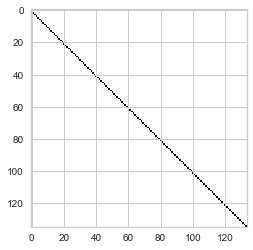

In [30]:
plt.imshow(est.named_steps.polynomialfeatures.powers_)

In [31]:
degree = 2
est = make_pipeline(PolynomialFeatures(degree), RidgeCV())
est.fit(X_train, y_train)
# est.named_steps["est"]
ydata = est.named_steps.ridgecv.coef_

ypredict = est.predict(X_test)

print(mean_absolute_error(ypredict, y_test))
print(r2_score(ypredict, y_test))
print(est.named_steps.ridgecv)

0.5568979194294275
-0.0016518733946075947
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)


In [32]:
#Getting even worse... don't need to run

# degree = 3
# est = make_pipeline(PolynomialFeatures(degree), RidgeCV())
# est.fit(X_train, y_train)
# # est.named_steps["est"]
# ydata = est.named_steps.ridgecv.coef_

# ypredict = est.predict(X_test)

# print(mean_absolute_error(ypredict, y_test))
# print(r2_score(ypredict, y_test))
# print(est.named_steps.ridgecv)

In [33]:
##### lasso

alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,0 , 1, 2, 3,4,5]
degree = 1
for alpha in alphas:
    est = make_pipeline(PolynomialFeatures(degree), LassoCV())

    est.fit(X_train, y_train)
    
    ypredict = est.predict(X_test)
    
mae = mean_absolute_error(ypredict, y_test)
rmse = sqrt(mae)

percentageofmean = float(rmse/listingdf2.log_price.mean())

print(mae)
print(rmse)
print(listingdf2.log_price.mean())
print(percentageofmean)

print(r2_score(ypredict, y_test))
print(est.named_steps.lassocv)


0.26288565382396084
0.5127237597614926
4.711149872034472
0.10883197811324925
0.3453421878662353
LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)


In [34]:
#X = listingdf2.iloc[:,:-3].as_matrix()
#y = listingdf2.iloc[:,-1:].as_matrix()

X = listingdf2.iloc[:,:-3]
y = listingdf2.iloc[:,-1:]



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size=0.2)

In [35]:
lr = LinearRegression()
lr.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
lr.coef_


array([[-6.63583395e-04, -7.11828974e-03,  3.78430753e-02,
         7.88893712e-02,  1.35918112e-01, -1.19345373e-02,
         2.02324359e-03,  2.25432820e-02,  1.48794998e-04,
        -1.88426992e-05, -6.72367184e-04,  6.79727440e-03,
         8.53513806e-03, -2.56079178e-03,  6.03222392e-03,
        -5.21772709e-03,  1.99562062e-02, -6.63535975e-02,
         1.23185896e-02, -1.23185896e-02,  3.25594264e-02,
        -8.51066712e-02,  2.97651680e-02, -4.92491990e-02,
         7.20312757e-02,  3.76893838e-01, -2.07184036e-02,
        -3.56175435e-01, -7.99403440e-02, -5.53363931e-03,
         7.95542232e-01,  7.94964915e-02, -1.32815111e-02,
        -2.19439909e-01,  1.12413732e-01, -6.83860333e-02,
        -4.91515403e-01, -2.50778329e-02,  1.39262844e-01,
        -8.44613543e-02, -2.50713450e-02, -1.14007926e-01,
        -5.84376494e-02,  5.84376494e-02,  2.28227772e-02,
         8.54128905e-02, -1.21721640e-01, -3.11146010e-02,
         2.32601221e-01, -3.72757917e-01,  4.17786703e-0

In [37]:
coefdf = pd.DataFrame({'colname':listingdf2.columns[:-3], 'value':lr.coef_[0]})
coefdf
#coefdf.sort_values(by=['value'])



,colname,value
0,host_response_rate,-0.000664
1,host_acceptance_rate,-0.007118
2,accommodates,0.037843
3,bathrooms,0.078889
4,bedrooms,0.135918
5,beds,-0.011935
6,cleaning_fee,0.002023
7,guests_included,0.022543
8,minimum_nights,0.000149
9,maximum_nights,-0.000019


In [38]:
##### ElasticNet

degree = 1

est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV())
est.fit(X_train, y_train)
ypredict = est.predict(X_test)

mae = mean_absolute_error(ypredict, y_test)
rmse = sqrt(mae)
percentageofmean = float(rmse/listingdf2.log_price.mean())

print(mae)
print(rmse)
print(percentageofmean)
print(r2_score(ypredict, y_test))
print(est.named_steps.elasticnetcv)


0.2643706358327102
0.5141698511510668
0.10913892894878904
0.32245491284105043
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)


<function matplotlib.pyplot.show(*args, **kw)>

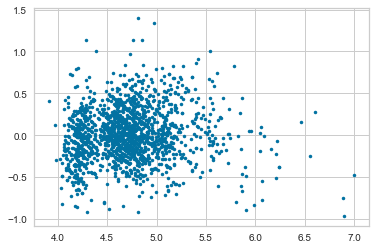

In [39]:
#Ploting ALL Features - train


# plt.plot(X_train, est.predict(X_train), label = 'alpha = 1')

plt.plot(est.predict(X_train.as_matrix()), (y_train.as_matrix().flatten("F") - est.predict(X_train.as_matrix()).flatten("F")),'.',label = 'alpha = 1')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

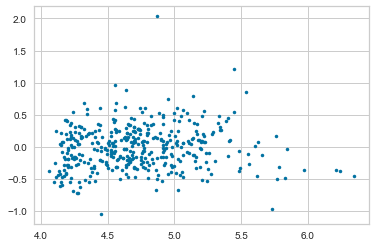

In [40]:
#Ploting ALL Features - X test

# plt.plot(X_train, est.predict(X_train), label = 'alpha = 1')

plt.plot(est.predict(X_test.as_matrix()), (y_test.as_matrix().flatten("F") - est.predict(X_test.as_matrix()).flatten("F")),'.',label = 'alpha = 1')

plt.show

In [41]:

# list = []

# for column in X_train.columns:
#     list.append(column)
    
# list = "', '".join(list)
# print(list)


In [42]:
# coef005 = pd.read_csv('coefdf005.csv',"r",delimiter=',')
# coef005= coef005.drop(['Unnamed: 0'], axis = 1)
# coef005

In [43]:
coef005 = pd.read_csv('coefdf005.csv',"r",delimiter=',')
coef005= coef005.drop(['Unnamed: 0'], axis = 1)
list = []
for i in coef005['colname']:
    list.append(i)
    
list = "','".join(list)
print(list)

property_type_Boat','neighbourhood_cleansed_PioneerSquare','neighbourhood_cleansed_SunsetHill','room_type_Entirehome_apt','neighbourhood_cleansed_SouthLakeUnion','neighbourhood_cleansed_CentralBusinessDistrict','neighbourhood_cleansed_Pike_Market','neighbourhood_cleansed_LowerQueenAnne','neighbourhood_cleansed_YeslerTerrace','neighbourhood_cleansed_FirstHill','neighbourhood_cleansed_InternationalDistrict','neighbourhood_cleansed_Belltown','neighbourhood_cleansed_EastQueenAnne','neighbourhood_cleansed_PortageBay','neighbourhood_cleansed_SoutheastMagnolia','neighbourhood_cleansed_MadisonPark','neighbourhood_cleansed_WestQueenAnne','neighbourhood_cleansed_Broadway','property_type_Loft','bedrooms','neighbourhood_cleansed_NorthAdmiral','property_type_Chalet','neighbourhood_cleansed_Stevens','neighbourhood_cleansed_Laurelhurst','neighbourhood_cleansed_Fauntleroy','neighbourhood_cleansed_Westlake','neighbourhood_cleansed_Montlake','host_response_time_afewdaysormore','neighbourhood_cleansed_Gr

In [44]:
subset1 = ['log_price', 'property_type_Boat','neighbourhood_cleansed_PioneerSquare','neighbourhood_cleansed_SunsetHill','room_type_Entirehome_apt','neighbourhood_cleansed_SouthLakeUnion','neighbourhood_cleansed_CentralBusinessDistrict','neighbourhood_cleansed_Pike_Market','neighbourhood_cleansed_LowerQueenAnne','neighbourhood_cleansed_YeslerTerrace','neighbourhood_cleansed_FirstHill','neighbourhood_cleansed_InternationalDistrict','neighbourhood_cleansed_Belltown','neighbourhood_cleansed_EastQueenAnne','neighbourhood_cleansed_PortageBay','neighbourhood_cleansed_SoutheastMagnolia','neighbourhood_cleansed_MadisonPark','neighbourhood_cleansed_WestQueenAnne','neighbourhood_cleansed_Broadway','property_type_Loft','bedrooms','neighbourhood_cleansed_NorthAdmiral','property_type_Chalet','neighbourhood_cleansed_Stevens','neighbourhood_cleansed_Laurelhurst','neighbourhood_cleansed_Fauntleroy','neighbourhood_cleansed_Westlake','neighbourhood_cleansed_Montlake','host_response_time_afewdaysormore','neighbourhood_cleansed_GreenLake','neighbourhood_cleansed_CedarPark','neighbourhood_cleansed_Seaview','neighbourhood_cleansed_Alki','property_type_Bungalow','neighbourhood_cleansed_Minor','bathrooms','neighbourhood_cleansed_Fremont','bed_type_RealBed','neighbourhood_cleansed_Harrison_Denny_Blaine','host_is_superhost_t','neighbourhood_cleansed_NorthBeaconHill','host_is_superhost_f','neighbourhood_cleansed_Meadowbrook','neighbourhood_cleansed_Interbay','neighbourhood_cleansed_SouthPark','review_scores_value','property_type_Condominium','host_response_time_withinanhour','neighbourhood_cleansed_FairmountPark','neighbourhood_cleansed_Leschi','property_type_Apartment','neighbourhood_cleansed_Wedgwood','property_type_Other','bed_type_Couch','neighbourhood_cleansed_HighlandPark','neighbourhood_cleansed_Roosevelt','neighbourhood_cleansed_UniversityDistrict','neighbourhood_cleansed_MapleLeaf','neighbourhood_cleansed_Greenwood','property_type_Yurt','neighbourhood_cleansed_Riverview','neighbourhood_cleansed_PhinneyRidge','neighbourhood_cleansed_SewardPark','neighbourhood_cleansed_ArborHeights','neighbourhood_cleansed_CrownHill','neighbourhood_cleansed_Bryant','neighbourhood_cleansed_Pinehurst','neighbourhood_cleansed_ColumbiaCity','neighbourhood_cleansed_OlympicHills','neighbourhood_cleansed_NorthDelridge','neighbourhood_cleansed_Mid_BeaconHill','neighbourhood_cleansed_Ravenna','neighbourhood_cleansed_Dunlap','property_type_Camper_RV','neighbourhood_cleansed_SouthDelridge','neighbourhood_cleansed_RainierBeach','neighbourhood_cleansed_HighPoint','neighbourhood_cleansed_VictoryHeights','neighbourhood_cleansed_Brighton','neighbourhood_cleansed_SouthBeaconHill','room_type_Sharedroom','neighbourhood_cleansed_BitterLake','neighbourhood_cleansed_Broadview','property_type_Dorm']
                
listingdf3 = listingdf2[subset1]

X2 = listingdf3.iloc[:,1:]
y2 = listingdf3.iloc[:,:1]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 123, test_size=0.2)

In [45]:
##### ElasticNet

degree = 1

est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV())
est.fit(X2_train, y2_train)
ypredict = est.predict(X2_test)

mae = mean_absolute_error(ypredict, y2_test)
rmse = sqrt(mae)
percentageofmean = float(rmse/listingdf3.log_price.mean())

print(mae)
print(rmse)
print(percentageofmean)
print(r2_score(ypredict, y2_test))
print(est.named_steps.elasticnetcv.alpha_)

print(est.named_steps.elasticnetcv)

0.23905676860071068
0.48893431931161335
0.10378237428062781
0.5682295807020199
0.0008969380448968342
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)


<function matplotlib.pyplot.show(*args, **kw)>

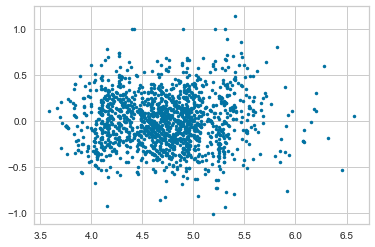

In [46]:
#Ploting ALL Features - train


# plt.plot(X_train, est.predict(X_train), label = 'alpha = 1')

plt.plot(est.predict(X2_train.as_matrix()), (y2_train.as_matrix().flatten("F") - est.predict(X2_train.as_matrix()).flatten("F")),'.',label = 'alpha = 1')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

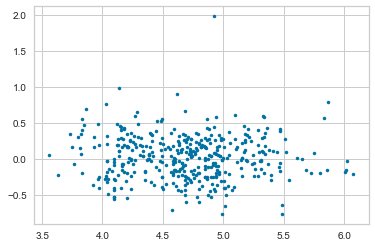

In [47]:
#Ploting ALL Features - X test

# plt.plot(X_train, est.predict(X_train), label = 'alpha = 1')

plt.plot(est.predict(X2_test.as_matrix()), (y2_test.as_matrix().flatten("F") - est.predict(X2_test.as_matrix()).flatten("F")),'.',label = 'alpha = 1')

plt.show

In [48]:
second = pd.read_csv('second.csv',"r",delimiter=',')
second= second.drop(['Unnamed: 0'], axis = 1)
list = []
for i in second['colname']:
    list.append(i)
    
list = "','".join(list)
print(list)

property_type_Boat','neighbourhood_cleansed_PioneerSquare','neighbourhood_cleansed_SunsetHill','room_type_Entirehome_apt','neighbourhood_cleansed_SouthLakeUnion','neighbourhood_cleansed_CentralBusinessDistrict','neighbourhood_cleansed_Pike_Market','neighbourhood_cleansed_LowerQueenAnne','neighbourhood_cleansed_YeslerTerrace','neighbourhood_cleansed_FirstHill','neighbourhood_cleansed_InternationalDistrict','neighbourhood_cleansed_Belltown','neighbourhood_cleansed_EastQueenAnne','property_type_Loft','bedrooms','property_type_Chalet','host_response_time_afewdaysormore','property_type_Bungalow','bed_type_RealBed','host_is_superhost_t','host_is_superhost_f','review_scores_value','property_type_Condominium','host_response_time_withinanhour','property_type_Apartment','property_type_Other','bed_type_Couch','property_type_Yurt','property_type_Camper_RV','neighbourhood_cleansed_SouthDelridge','neighbourhood_cleansed_RainierBeach','neighbourhood_cleansed_HighPoint','neighbourhood_cleansed_Victory

In [49]:
subset2 = ['log_price', 'property_type_Boat','neighbourhood_cleansed_PioneerSquare','neighbourhood_cleansed_SunsetHill','room_type_Entirehome_apt','neighbourhood_cleansed_SouthLakeUnion','neighbourhood_cleansed_CentralBusinessDistrict','neighbourhood_cleansed_Pike_Market','neighbourhood_cleansed_LowerQueenAnne','neighbourhood_cleansed_YeslerTerrace','neighbourhood_cleansed_FirstHill','neighbourhood_cleansed_InternationalDistrict','neighbourhood_cleansed_Belltown','neighbourhood_cleansed_EastQueenAnne','property_type_Loft','bedrooms','property_type_Chalet','host_response_time_afewdaysormore','property_type_Bungalow','bed_type_RealBed','host_is_superhost_t','host_is_superhost_f','review_scores_value','property_type_Condominium','host_response_time_withinanhour','property_type_Apartment','property_type_Other','bed_type_Couch','property_type_Yurt','property_type_Camper_RV','neighbourhood_cleansed_SouthDelridge','neighbourhood_cleansed_RainierBeach','neighbourhood_cleansed_HighPoint','neighbourhood_cleansed_VictoryHeights','neighbourhood_cleansed_Brighton','neighbourhood_cleansed_SouthBeaconHill','room_type_Sharedroom','neighbourhood_cleansed_BitterLake','neighbourhood_cleansed_Broadview','property_type_Dorm']
                
listingdf4 = listingdf2[subset2]

X3 = listingdf4.iloc[:,1:]
y3 = listingdf4.iloc[:,:1]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state = 123, test_size=0.2)

In [50]:
##### ElasticNet

degree = 1

est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV())
est.fit(X3_train, y3_train)
ypredict = est.predict(X3_test)

mae = mean_absolute_error(ypredict, y3_test)
rmse = sqrt(mae)
percentageofmean = float(rmse/listingdf4.log_price.mean())

print(mae)
print(rmse)
print(percentageofmean)
print(r2_score(ypredict, y3_test))
print(est.named_steps.elasticnetcv.alpha_)

print(est.named_steps.elasticnetcv)

0.25424596301853986
0.5042280863047395
0.10702866603710755
0.4649134907183454
0.0005901253401970288
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)


<function matplotlib.pyplot.show(*args, **kw)>

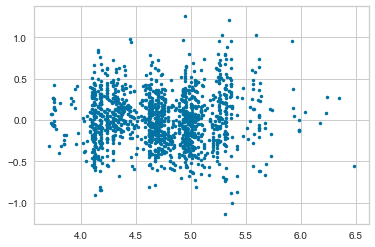

In [51]:
#Ploting ALL Features - train


# plt.plot(X_train, est.predict(X_train), label = 'alpha = 1')

plt.plot(est.predict(X3_train.as_matrix()), (y3_train.as_matrix().flatten("F") - est.predict(X3_train.as_matrix()).flatten("F")),'.',label = 'alpha = 1')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

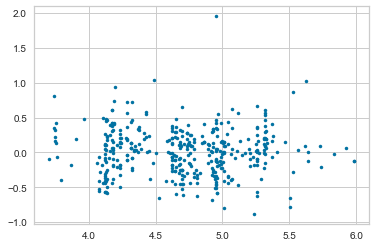

In [52]:
#Ploting ALL Features - X test

# plt.plot(X_train, est.predict(X_train), label = 'alpha = 1')

plt.plot(est.predict(X3_test.as_matrix()), (y3_test.as_matrix().flatten("F") - est.predict(X3_test.as_matrix()).flatten("F")),'.',label = 'alpha = 1')

plt.show

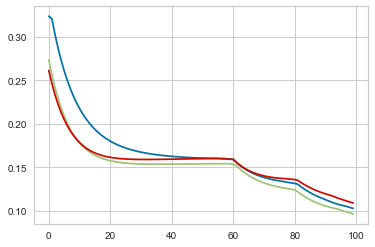

In [53]:
##### ElasticNet

degree = 1

est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV())
est.fit(X_train, y_train)
ypredict = est.predict(X_test)


mse = est.named_steps.elasticnetcv.mse_path_
mse

plt.plot(mse)



# rmse = sqrt(mae)
# percentageofmean = float(rmse/listingdf2.log_price.mean())

# print(mae)
# print(rmse)
# print(percentageofmean)
# print(r2_score(ypredict, y_test))
# print(est.named_steps.elasticnetcv)


In [54]:
#Ploting some of the Features

X_test_temp = X_test.loc[:,['host_response_rate']]

plt.plot(est.predict(X_test_temp.as_matrix()), (y_test.as_matrix() - est.predict(X_test_temp.as_matrix())),'.',label = 'alpha = 1')

plt.show

ValueError: X shape does not match training shape